
## Nội dung

1. Huấn luyện mô hình Linear Regression trên tập dữ liệu giá nhà (house price dataset)
2. Xử lý các feature có phân bố lệch (data skewness)
3. Huấn luyện dữ liệu trên các mô hình: Lasso, Ridge, ElasticNet
4. Xử lý nhiễu

Dữ liệu: dự đoán giá nhà (nguồn: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

### 1. Chuẩn bị dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/house_price.csv')

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# Bỏ cột Id
cols_to_drop = ['Id']
df = df.drop(cols_to_drop, axis=1)

In [5]:
miss = df.isna().sum()
miss = miss[miss > 0]
print('Danh sách các cột thiếu dữ liệu:\n')
print(miss)
print('\n\nSố lượng cột có dữ liệu thiếu:', len(miss))

Danh sách các cột thiếu dữ liệu:

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Số lượng cột có dữ liệu thiếu: 19


#### 1.1 Loại bỏ dữ liệu thiếu

- Tập trung vào mô hình là chính, nên ta sẽ bỏ hết các thuộc tính bị khuyết dữ liệu.
- Các thuộc tính còn lại có thể đủ cho việc xây dựng mô hình.

In [6]:
#todo
df = df.drop(miss.index, axis=1)

### 2. Encoding

In [ ]:
obj_type_cols = [col for col in df_simple.columns if df_simple[col].dtypes == 'object']

#### 2.1 Encode kiểu object về kiểu số

In [7]:
from sklearn.preprocessing import LabelEncoder
cols = [
    'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 
    'Functional', 'LandSlope','LotShape', 'PavedDrive',
    'Street', 'CentralAir', 'MSSubClass', 'OverallCond'
]

#todo
for c in cols:
    lbl = LabelEncoder()
    df[c] = lbl.fit_transform(list(df[c].values))

#### 2.2 Encode 1 hot

In [8]:
# todo
df = pd.get_dummies(df)

In [9]:
df.head()

MSSubClass  LotArea  Street  LotShape  LandSlope  OverallQual  OverallCond  \
0           5     8450       1         3          0            7            4   
1           0     9600       1         3          0            6            7   
2           5    11250       1         0          0            7            4   
3           6     9550       1         0          0            7            4   
4           5    14260       1         0          0            8            4   

   YearBuilt  YearRemodAdd  ExterQual  ...  SaleType_ConLw  SaleType_New  \
0       2003          2003          2  ...               0             0   
1       1976          1976          3  ...               0             0   
2       2001          2002          2  ...               0             0   
3       1915          1970          3  ...               0             0   
4       2000          2000          2  ...               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             0            1                      0                      0   
1             0            1                      0                      0   
2             0            1                      0                      0   
3             0            1                      1                      0   
4             0            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 187 columns]

### 3. Huấn luyện mô hình

#### 3.1 Linear regression - v0

In [10]:
y = df['SalePrice'].to_numpy()
X = df.drop(['SalePrice'], axis=1).to_numpy()

In [11]:
from sklearn.model_selection import train_test_split

# chia dữ liệu train/test (30%) - 99
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [13]:
X.shape

(1460, 186)

In [12]:
print(X_train.shape)
print(X_test.shape)

(1022, 186)
(438, 186)


In [14]:
print(y_train.shape)
print(y_test.shape)

(1022,)
(438,)


In [16]:
from sklearn.linear_model import LinearRegression

In [15]:
def train_model(X, y, model):
    '''
    Args:
        X: input
        y: groundtruth
        model: model instance (sklearn model)
    Return:
        model: trained model after calling fit
        score: training score
    '''
    # fit model
    model = model.fit(X, y)
    
    # tính score
    score = model.score(X, y)
    print("Training score: {:.4f}".format(score))
    
    pred = model.predict(X)
    pd.DataFrame({'True values': y, 'Pred': pred}).plot.scatter(x='True values', y='Pred')

    
    return model, score

Training score: 0.9227


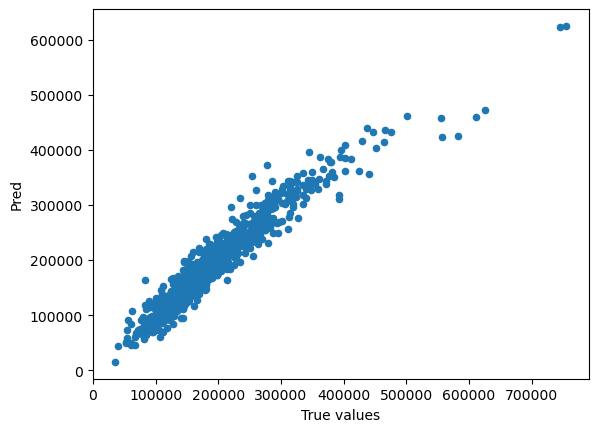

In [17]:
lr_v0 = LinearRegression()
lr_v0, score_v0 = train_model(X_train, y_train, lr_v0)

In [19]:
# tính test score
test_score_v0 = lr_v0.score(X_test, y_test)
test_score_v0

0.8190610039726753

#### 3.2 Linear regression + xử lý đặc trưng có phân bố lệch - v1

##### 3.2.1 Skewness

In [55]:
df = pd.read_csv('data/house_price.csv')

In [56]:
# Bỏ cột Id
cols_to_drop = ['Id']
df = df.drop(cols_to_drop, axis=1)

In [57]:
miss = df.isna().sum()
miss = miss[miss > 0]
print('Danh sách các cột thiếu dữ liệu:\n')
print(miss)
print('\n\nSố lượng cột có dữ liệu thiếu:', len(miss))

Danh sách các cột thiếu dữ liệu:

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Số lượng cột có dữ liệu thiếu: 19


In [58]:
#todo
df = df.drop(miss.index, axis=1)

In [59]:
df.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    Inside       Gtl      CollgCr  ...             0         0           0   
1       FR2       Gtl      Veenker  ...             0         0           0   
2    Inside       Gtl      CollgCr  ...             0         0           0   
3    Corner       Gtl      Crawfor  ...           272         0           0   
4       FR2       Gtl      NoRidge  ...             0         0           0   

  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition SalePrice  
0        0        0       2    2008        WD        Normal    208500  
1        0        0       5    2007        WD        Normal    181500  
2        0        0       9    2008        WD        Normal    223500  
3        0        0       2    2006        WD       Abnorml    140000  
4        0        0      12    2008        WD        Normal    250000  

[5 rows x 61 columns]

In [60]:
cols = [
    'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 
    'Functional', 'LandSlope','LotShape', 'PavedDrive',
    'Street', 'CentralAir', 'MSSubClass', 'OverallCond'
]

#todo
for c in cols:
    lbl = LabelEncoder()
    df[c] = lbl.fit_transform(list(df[c].values))

In [23]:
from scipy.stats import norm, skew
from scipy import stats

In [61]:
df["SalePrice"] = np.log1p(df["SalePrice"])

In [62]:
def calc_skew(df_col):
    return skew(df_col)

In [63]:
# xử lý skewness cho các thuộc tính còn lại
numeric_feats = df.dtypes[df.dtypes != 'object'].index

skew_feats = df[numeric_feats].apply(calc_skew).sort_values(ascending=False)

In [64]:
skew_feats

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
LandSlope         4.808735
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
MSSubClass        0.658176
Fireplaces        0.648898
BsmtFullBath      0.595454
HeatingQC         0.482722
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
SalePrice         0.121222
YrSold            0.096170
FullBath          0.036524
GarageCars       -0.342197
YearRemodAdd     -0.503044
LotShape         -0.609548
YearBuilt        -0.612831
K

In [65]:
skew_feats = pd.DataFrame({'Skew': skew_feats})

In [66]:
skew_feats.head(10)

Skew
MiscVal       24.451640
PoolArea      14.813135
LotArea       12.195142
3SsnPorch     10.293752
LowQualFinSF   9.002080
LandSlope      4.808735
KitchenAbvGr   4.483784
BsmtFinSF2     4.250888
ScreenPorch    4.117977
BsmtHalfBath   4.099186

In [67]:
from scipy.special import boxcox1p

skew_features = skew_feats.index

# lamda ~ [-5, 5]
lam = 0.15
for feat in skew_features:
    if abs(skew_feats.loc[feat]['Skew'] > 0.75):
        df[feat] = boxcox1p(df[feat], lam)

In [68]:
# encode 1-hor
df = pd.get_dummies(df)

In [69]:
df.head()

MSSubClass    LotArea  Street  LotShape  LandSlope  OverallQual  \
0           5  19.212182       1         3        0.0            7   
1           0  19.712205       1         3        0.0            6   
2           5  20.347241       1         0        0.0            7   
3           6  19.691553       1         0        0.0            7   
4           5  21.325160       1         0        0.0            8   

   OverallCond  YearBuilt  YearRemodAdd  ExterQual  ...  SaleType_ConLw  \
0            4       2003          2003          2  ...               0   
1            7       1976          1976          3  ...               0   
2            4       2001          2002          2  ...               0   
3            4       1915          1970          3  ...               0   
4            4       2000          2000          2  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 187 columns]

##### 3.2.2 Chia train/test

In [71]:
y = df['SalePrice'].to_numpy()
X = df.drop(['SalePrice'], axis=1).to_numpy()

In [72]:
# Chia tập dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

##### 3.2.3 Huấn luyện

In [74]:
lr_v1 = LinearRegression()

Training score: 0.9517


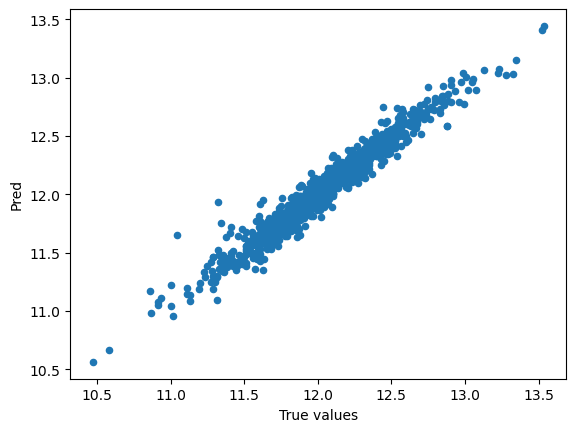

In [75]:
# todo - train và tính score cho model v1
lr_v1, score_v1 = train_model(X_train, y_train, lr_v1)

In [76]:
# tính test score
test_score_v1 = lr_v1.score(X_test, y_test)
test_score_v1

0.8740038838739599

##### 3.2.4 Khảo sát hệ số của mô hình

Tới lúc này, ta đã hiểu được cách sử dụng mô hình, cách huấn luyện, cách test hiệu suất của mô hình trên các tập dữ liệu train/test.

- Phần này ta sẽ đi sâu hơn, là khảo sát các hệ số của mô hình (như trong slide lý thuyết, nó là các hệ số w: w1, w2,...wn)

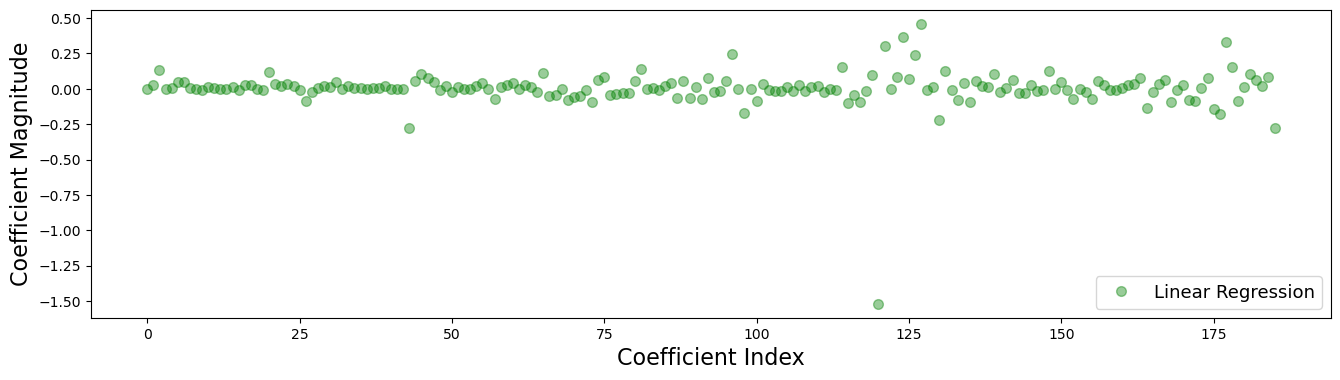

In [77]:
fig, ax = plt.subplots(1, figsize=(16, 4))
ax.plot(lr_v1.coef_, alpha=0.4, linestyle='none', marker='o', markersize=7, color='green', label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [78]:
# lr_v1.coef_
min_index = np.argmin(lr_v1.coef_)
min_index

120

In [79]:
df.columns[min_index]

'RoofStyle_Shed'

In [80]:
max_index = np.argmax(lr_v1.coef_)
print(max_index)
df.columns[max_index]

127


'RoofMatl_WdShake'

In [81]:
list(df.columns).index('GrLivArea')

20

In [82]:
lr_v1.coef_[20]

0.12151365813719041

#### 3.3 Lasso + xử lý đặc trưng có phân bố lệch - v2

##### 3.3.1 Huấn luyện

In [83]:
from sklearn.linear_model import Lasso

Training score: 0.5345


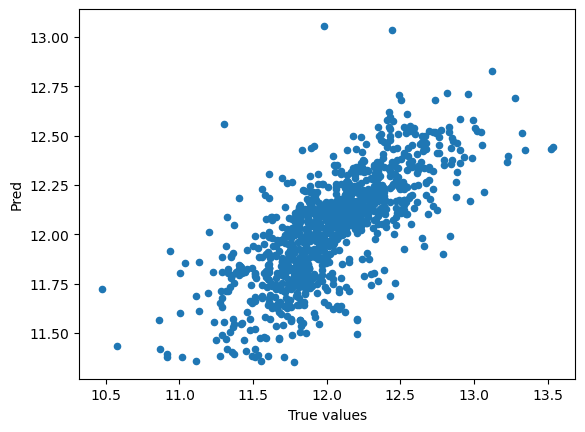

In [85]:
lasso_v2 = Lasso()
lasso_v2, score_v2 = train_model(X_train, y_train, lasso_v2)

Train 4 mô hình Lasso, với các giá trị alpha lần lượt là 1.0, 0.1, 0.01, 0.001. Với mỗi mô hình train xong, tính test score

Training score: 0.5345
Test score:  0.5925932747795264
Training score: 0.7643
Test score:  0.7734499168271429
Training score: 0.8870
Test score:  0.8604720057079347
Training score: 0.9298
Test score:  0.8828041318029423


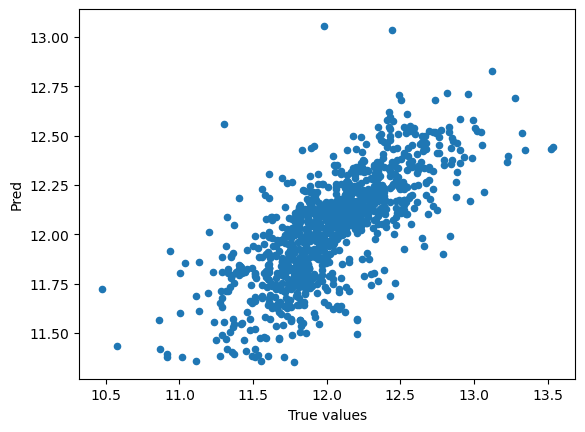

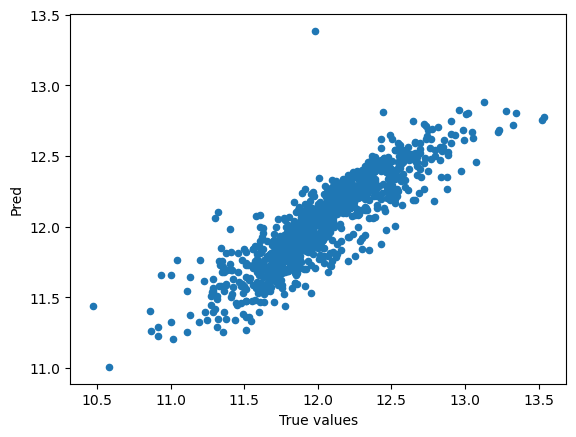

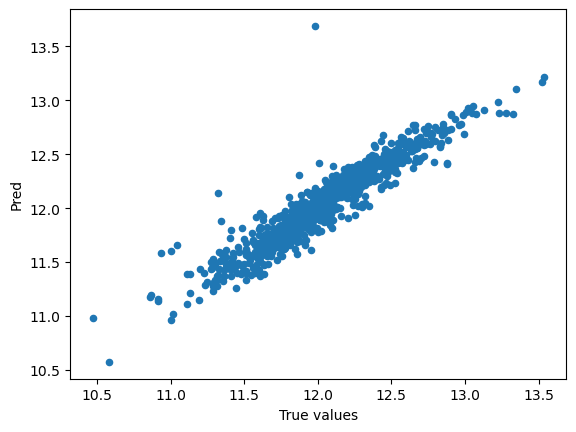

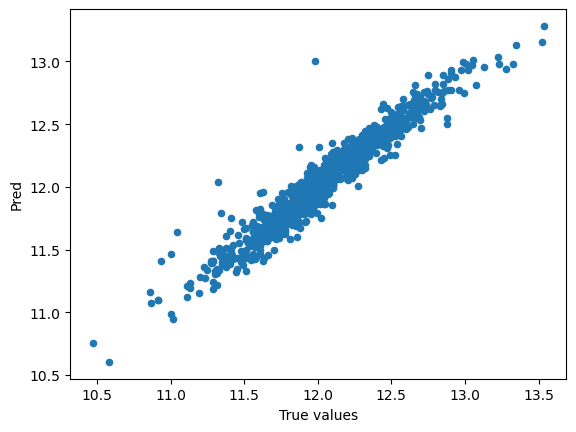

In [90]:
# todo
alphas = [1.0, 0.1, 0.01, 0.001]
for alpha in alphas:
    lasso  = Lasso(alpha=alpha)
    lasso, _ = train_model(X_train, y_train, lasso)
    
    print('Test score: ', lasso.score(X_test, y_test))

Training score: 0.9298


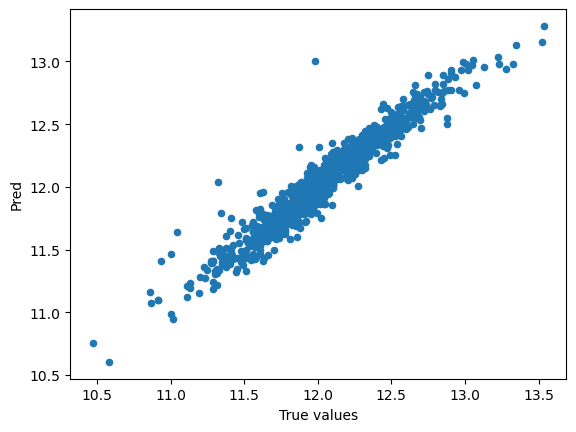

In [87]:
lasso_v3 = Lasso(alpha=0.001)
lasso_v3, score_v3 = train_model(X_train, y_train, lasso_v3)

In [89]:
test_score_v3 = lasso_v3.score(X_test, y_test)
test_score_v3

0.8828041318029423

##### 3.3.2 Khảo sát tham số của mô hình

Khảo sát hệ số của Lasso so với LR.

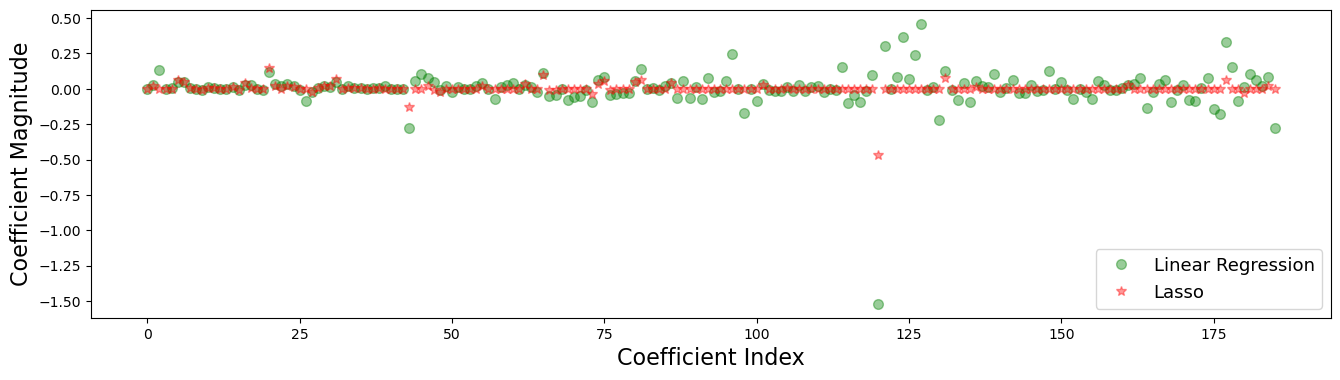

In [91]:
fig, ax = plt.subplots(1, figsize=(16, 4))
ax.plot(lr_v1.coef_, alpha=0.4, linestyle='none', marker='o', markersize=7, color='green', label='Linear Regression')
ax.plot(lasso_v3.coef_, alpha=0.4, linestyle='none', marker='*', markersize=7, color='red', label='Lasso')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [92]:
lasso_v3.coef_[lasso_v3.coef_ == 0].shape

(119,)

In [93]:
lasso_v3.coef_[20]

0.14504317022735547

#### 3.4 Ridge + xử lý đặc trưng có phân bố lệch - v3

##### 3.4.1 Huấn luyện

In [94]:
from sklearn.linear_model import Ridge

Train 4 mô hình Ridge, với các giá trị alpha lần lượt là 1.0, 0.1, 0.01, 0.001. Với mỗi mô hình train xong, tính test score

Training score: 0.9466
Test score:  0.8819171004042626
Training score: 0.9515
Test score:  0.8761634147865587
Training score: 0.9517
Test score:  0.8742618965289289
Training score: 0.9517
Test score:  0.874030189191096


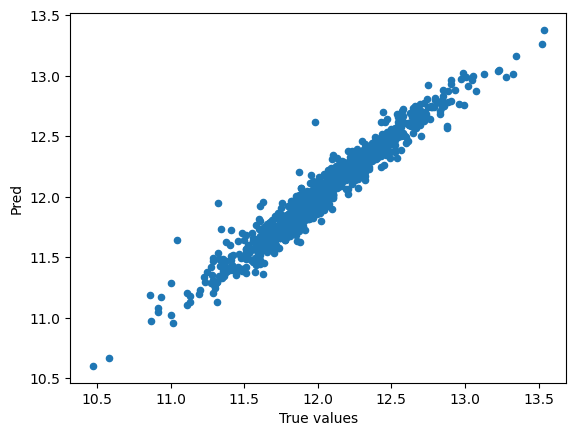

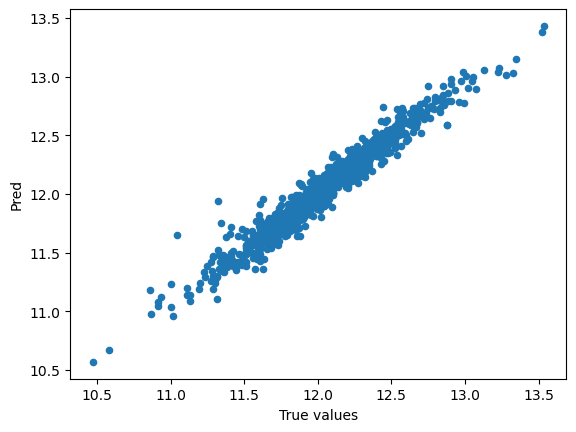

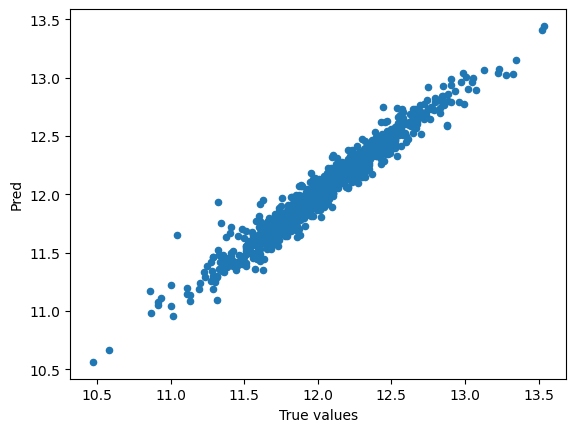

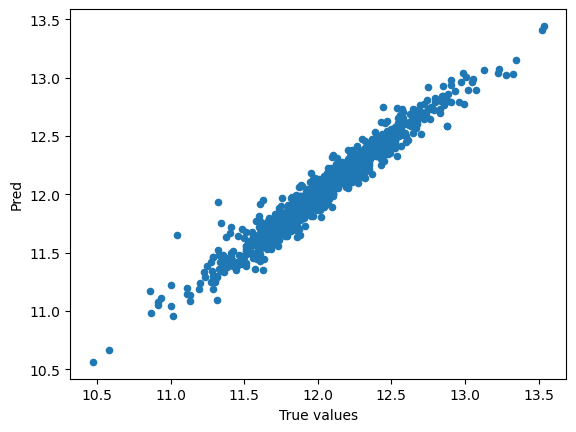

In [95]:
# todo
alphas = [1.0, 0.1, 0.01, 0.001]
for alpha in alphas:
    ridge  = Ridge(alpha=alpha)
    ridge, _ = train_model(X_train, y_train, ridge)
    
    print('Test score: ', ridge.score(X_test, y_test))

Training score: 0.9517


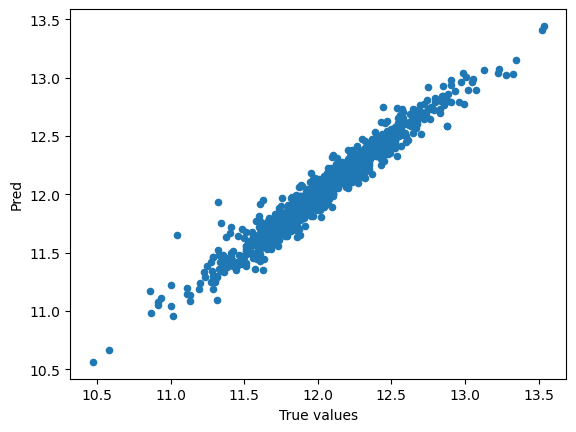

In [96]:
ridge_v4  = Ridge(alpha=1)
ridge_v4, _ = train_model(X_train, y_train, ridge)

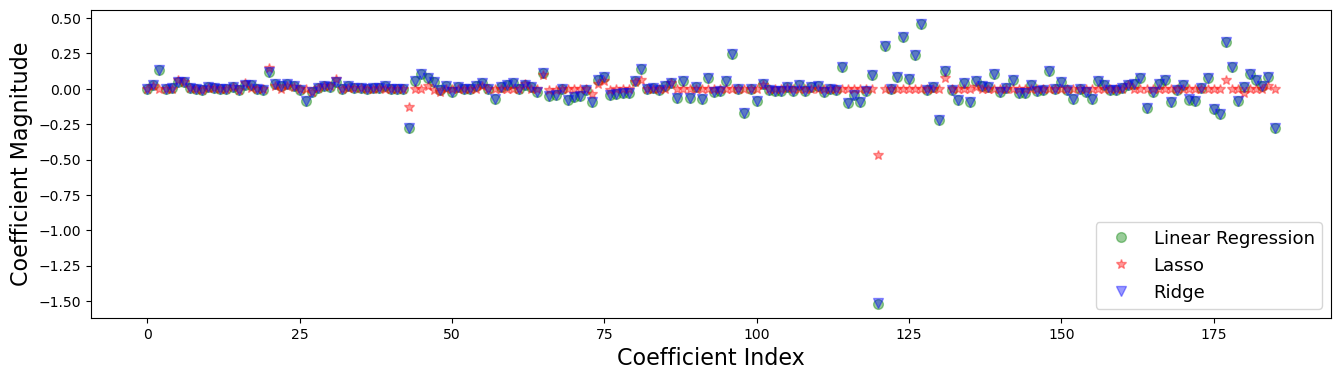

In [97]:
fig, ax = plt.subplots(1, figsize=(16, 4))
ax.plot(lr_v1.coef_, alpha=0.4, linestyle='none', marker='o', markersize=7, color='green', label='Linear Regression')
ax.plot(lasso_v3.coef_, alpha=0.4, linestyle='none', marker='*', markersize=7, color='red', label='Lasso')
ax.plot(ridge_v4.coef_, alpha=0.4, linestyle='none', marker='v', markersize=7, color='blue', label='Ridge')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

#### 3.5 ElasticNet + xử lý đặc trưng có phân bố lệch - v4

In [98]:
from sklearn.linear_model import ElasticNet

In [100]:
alphas = [1.0, 0.1, 0.01, 0.001]
l1_ratios = np.round(np.linspace(0, 1, 11)[1:-1], 2)

for alpha in alphas:
    for l1 in l1_ratios:
        elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1)
        elasticnet.fit(X_train, y_train)
        train_score = elasticnet.score(X_train, y_train)
        test_score = elasticnet.score(X_test, y_test)
        
        print(f'alpha: {alpha}\tl1: {l1}\train: {train_score}\ttest: {test_score}')

alpha: 1.0	l1: 0.1	rain: 0.732152090518536	test: 0.747630226828311
alpha: 1.0	l1: 0.2	rain: 0.5947892150192897	test: 0.6436585005821747
alpha: 1.0	l1: 0.3	rain: 0.567863067533415	test: 0.6235766784667864
alpha: 1.0	l1: 0.4	rain: 0.5521569161678159	test: 0.6113026659567661
alpha: 1.0	l1: 0.5	rain: 0.5470588375035701	test: 0.6067083719316144
alpha: 1.0	l1: 0.6	rain: 0.5452099297764206	test: 0.6045839614831945
alpha: 1.0	l1: 0.7	rain: 0.5430266061072111	test: 0.6021105954963081
alpha: 1.0	l1: 0.8	rain: 0.540508429788679	test: 0.5992878030877851
alpha: 1.0	l1: 0.9	rain: 0.5376559053840548	test: 0.5961161767667945
alpha: 0.1	l1: 0.1	rain: 0.8833582950291006	test: 0.8572220277999496
alpha: 0.1	l1: 0.2	rain: 0.8709933866265305	test: 0.8483694318838921
alpha: 0.1	l1: 0.3	rain: 0.8574103752716583	test: 0.8383860640486206
alpha: 0.1	l1: 0.4	rain: 0.8450910357042264	test: 0.8291306548188953
alpha: 0.1	l1: 0.5	rain: 0.8340536347293485	test: 0.8220676799039853
alpha: 0.1	l1: 0.6	rain: 0.82057491105

### Nhiễu

In [101]:
df = pd.read_csv('data/house_price.csv')

In [102]:
# Bỏ cột Id
cols_to_drop = ['Id']
df = df.drop(cols_to_drop, axis=1)

In [103]:
miss = df.isna().sum()
miss = miss[miss > 0]
print('Danh sách các cột thiếu dữ liệu:\n')
print(miss)
print('\n\nSố lượng cột có dữ liệu thiếu:', len(miss))

Danh sách các cột thiếu dữ liệu:

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Số lượng cột có dữ liệu thiếu: 19


In [104]:
#todo
df = df.drop(miss.index, axis=1)

In [105]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

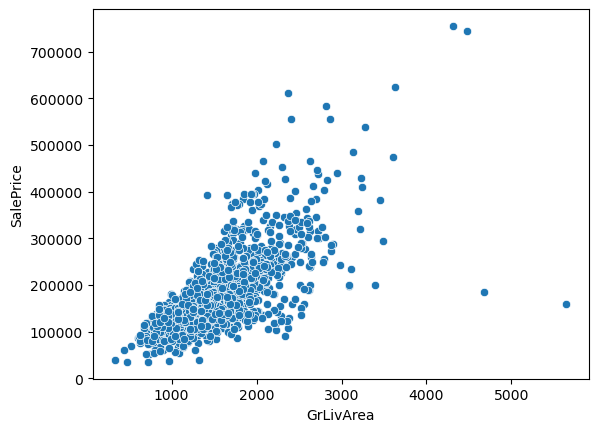

In [106]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

In [109]:
df[(df['GrLivArea'] > 4500) & (df['SalePrice'] < 300000)][['GrLivArea', 'SalePrice']]

GrLivArea  SalePrice
523        4676     184750
1298       5642     160000

In [110]:
df = df.drop([523, 1298], axis=0)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

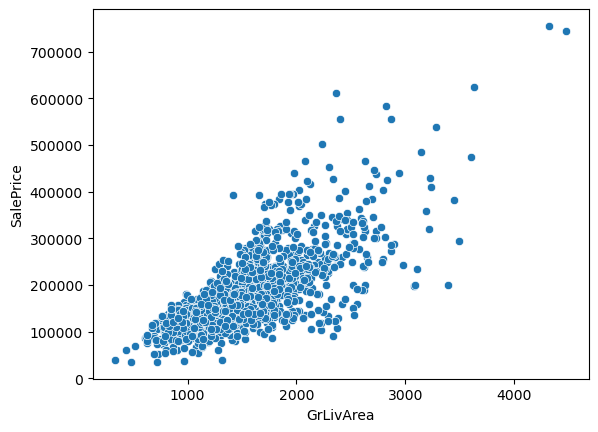

In [111]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

In [112]:
cols = [
    'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 
    'Functional', 'LandSlope','LotShape', 'PavedDrive',
    'Street', 'CentralAir', 'MSSubClass', 'OverallCond'
]

#todo
for c in cols:
    lbl = LabelEncoder()
    df[c] = lbl.fit_transform(list(df[c].values))

In [113]:
df["SalePrice"] = np.log1p(df["SalePrice"])

In [114]:
# xử lý skewness cho các thuộc tính còn lại
numeric_feats = df.dtypes[df.dtypes != 'object'].index

skew_feats = df[numeric_feats].apply(calc_skew).sort_values(ascending=False)

In [115]:
skew_feats = pd.DataFrame({'Skew': skew_feats})

In [116]:
skew_features = skew_feats.index

# lamda ~ [-5, 5]
lam = 0.15
for feat in skew_features:
    if abs(skew_feats.loc[feat]['Skew'] > 0.75):
        df[feat] = boxcox1p(df[feat], lam)

In [117]:
# encode 1-hor
df = pd.get_dummies(df)

In [118]:
y = df['SalePrice'].to_numpy()
X = df.drop(['SalePrice'], axis=1).to_numpy()
# Chia tập dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [119]:
print(X_train.shape)

(1020, 185)


Training score: 0.9502


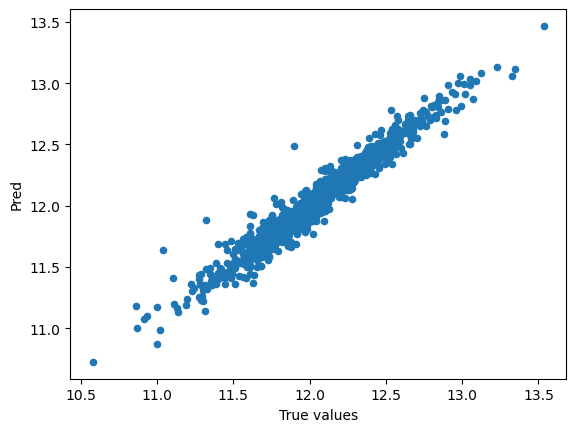

In [120]:
lr_v5 = LinearRegression()
lr_v5, score_v5 = train_model(X_train, y_train, lr_v5)

In [121]:
test_score_v4 = lr_v5.score(X_test, y_test)

In [122]:
test_score_v4

0.9061618899484796